<a href="https://colab.research.google.com/github/josehenriqueroveda/cancer-ML/blob/master/cancer_cervical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de riscos para câncer de colo de útero**

Montar o drive

In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Import de bibliotecas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Carregando base de dados

In [0]:
df = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Projects/MachineLearning/cancer_colo_utero.csv')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [0]:
# Eliminando colunas com muitos dados faltantes
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)

In [0]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

In [0]:
# Retirar os ? dos dados
df = df.replace('?', np.NaN)

Preencher os valores numéricos faltantes com a média da coluna

In [0]:
for feature in numerical_df:
    print(feature,'', pd.to_numeric(df[feature]).mean())
    feature_mean = round(pd.to_numeric(df[feature]).mean(),1)
    df[feature] = df[feature].fillna(feature_mean)

Age  26.82051282051282
Number of sexual partners  2.527644230769231
First sexual intercourse  16.995299647473562
Num of pregnancies  2.275561097256858
Smokes (years)  1.2197214125857985
Smokes (packs/year)  0.45314395064923096
Hormonal Contraceptives (years)  2.2564192013893343
IUD (years)  0.514804318488529
STDs (number)  0.17662682602921648


In [0]:
# Converte os dados pra numéricos
for feature in categorical_df:
  df[feature] = pd.to_numeric(df[feature]).fillna(1.0)

In [0]:
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

Exibir os dados para análise.
Observa-se que 'Hormonal Contraceptives' tem o maior número de registros positivos, o que indica ser um importante atributo na detecção do câncer de colo de útero.

In [0]:
sns.set(style='darkgrid', font_scale=1.1)
for feature in categorical_df:
   sns.catplot(feature,data=df,kind='count')

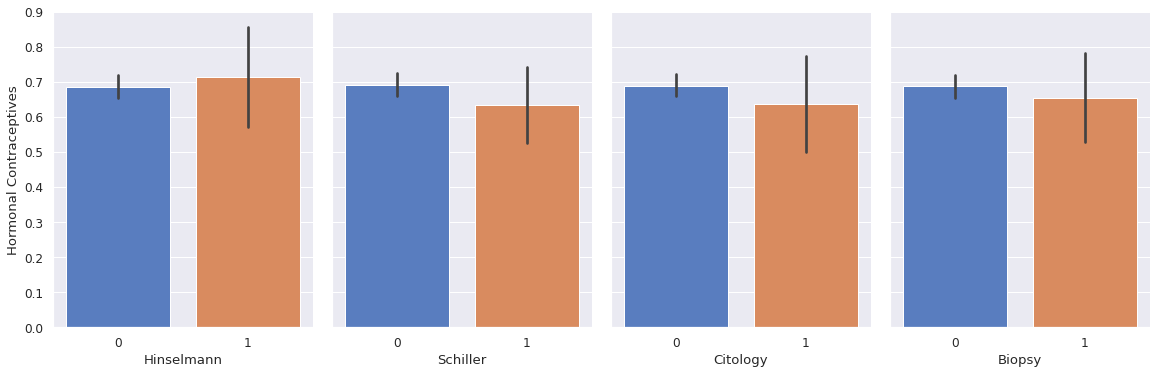

In [0]:
g = sns.PairGrid(df, y_vars=['Hormonal Contraceptives'], x_vars=category_df, aspect=0.8, height=5.0)
g.map(sns.barplot, palette='muted')

In [0]:
for feature in numerical_df:
  df[feature] = pd.to_numeric(df[feature])

print(f'Tempo mínimo usando contraceptivos hormonais: {min(df["Hormonal Contraceptives (years)"])} anos')
print(f'Tempo máximo usando contraceptivos hormonais: {max(df["Hormonal Contraceptives (years)"])} anos')

Tempo mínimo usando contraceptivos hormonais: 0.0 anos
Tempo máximo usando contraceptivos hormonais: 30.0 anos


Histograma de idade das mulheres

Média de idade das mulheres com risco de câncer de colo de útero 26.82051282051282


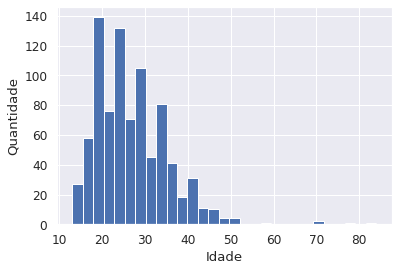

In [0]:
df['Age'].hist(bins='auto')
plt.xlabel('Idade')
plt.ylabel('Quantidade')

print(f'Média de idade das mulheres com risco de câncer de colo de útero {df["Age"].mean()}')

Nos gráficos abaixo, é observado que a média de idade de mulheres com o risco do câncer de colo de útero é 26 anos e o grupo com maior risco têm entre 20 a 35 anos de idade. 


---


Os gráficos também indicam um número significativo de mulheres que enfrentam o risco de câncer de colo de útero na idade por volta de 50 anos

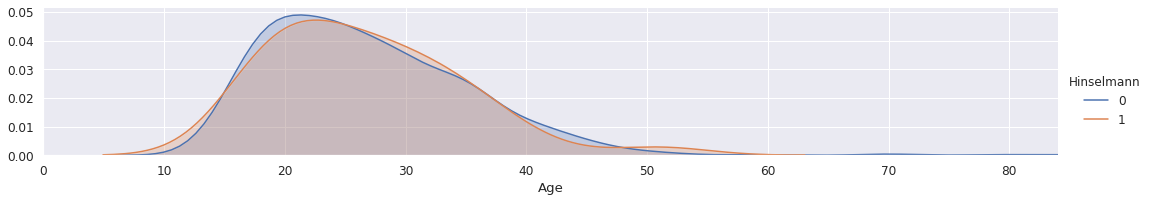

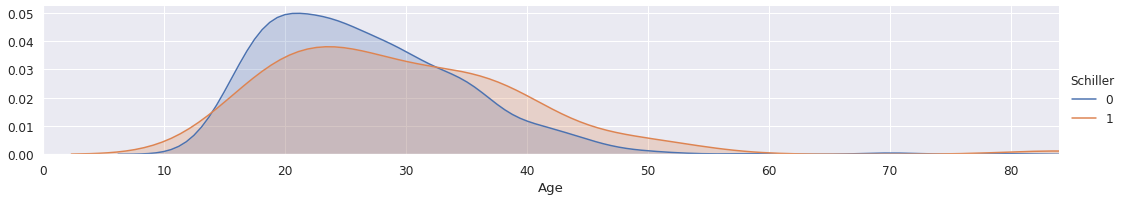

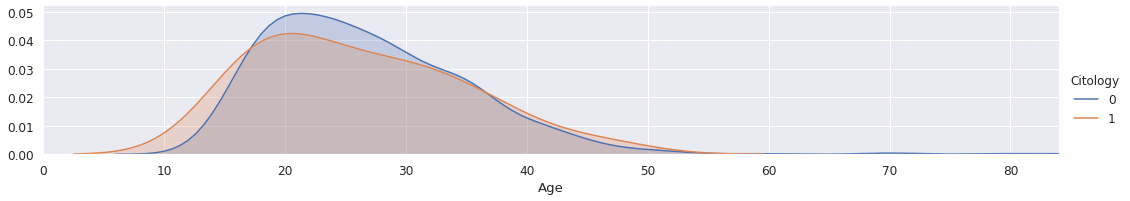

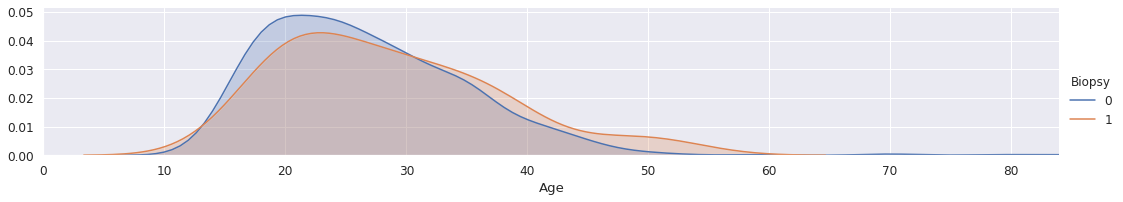

In [0]:
for feature in category_df:
  fig = sns.FacetGrid(df, hue=feature, aspect=5)
  fig.map(sns.kdeplot, 'Age', shade=True)
  oldest = df['Age'].max()
  fig.set(xlim=(0, oldest))
  fig.add_legend()

Já na imagem abaixo, é observado que: quanto maior a idade, maior a quantidade de parceiros sexuais, consequentemente aumentando a possibilidade de desenvolver o câncer.
Portanto, o número de parceiros também é um atributo importante para a detecção.

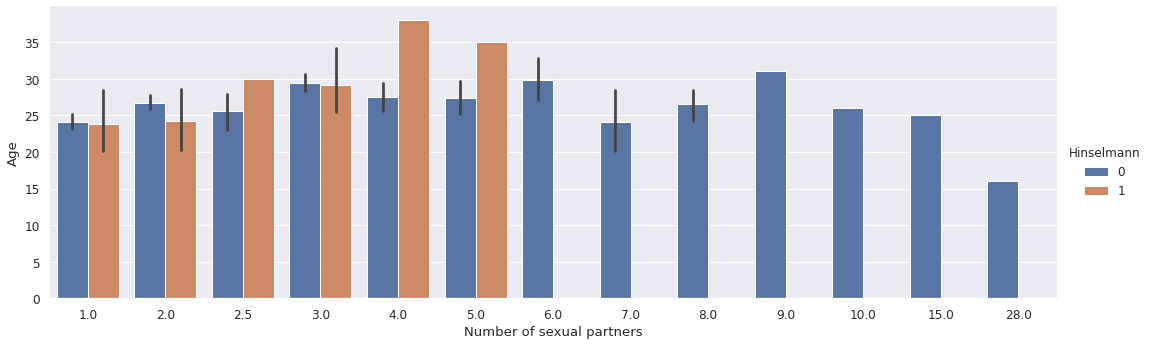

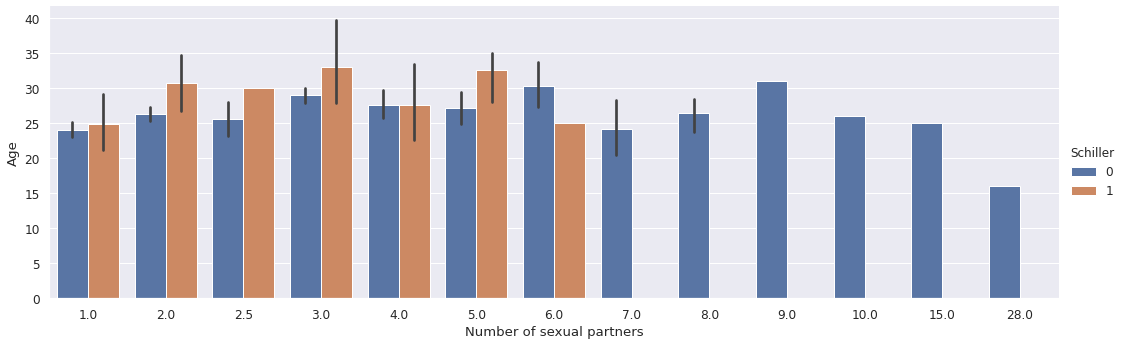

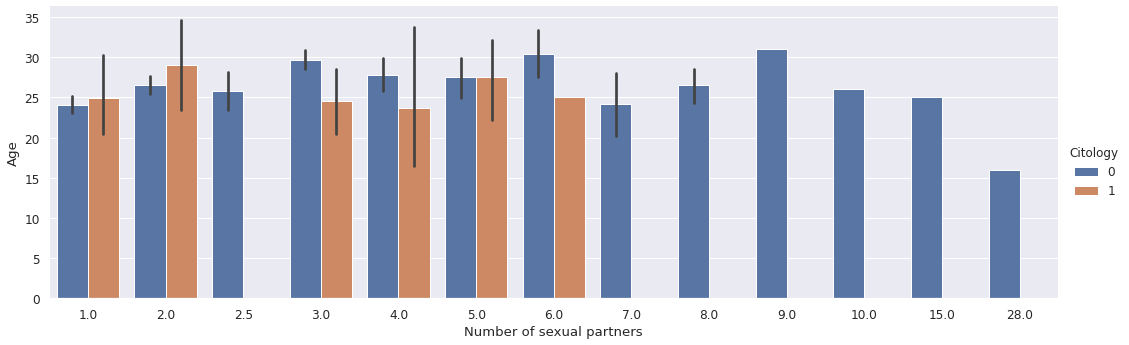

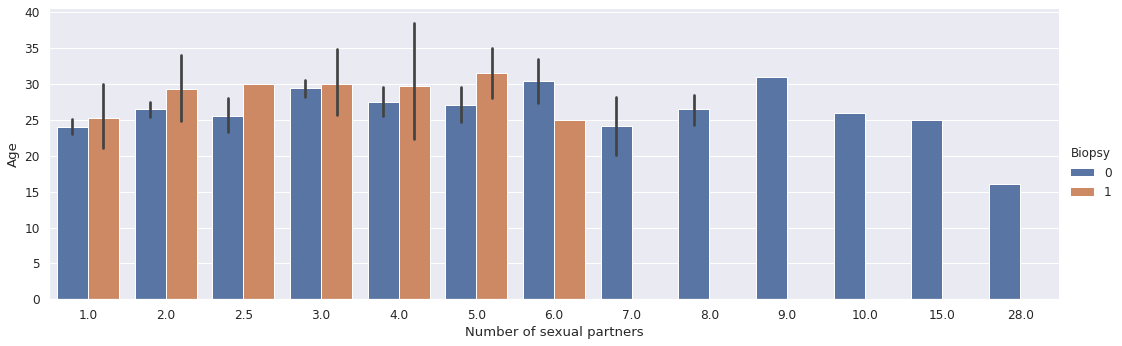

In [0]:
for feature in category_df:
  sns.catplot(x='Number of sexual partners', y='Age', hue=feature, data=df, aspect=3, kind='bar')

O gráfico abaixo mostra que a maioria das mulheres tiveram a primeira relação sexual entre 15 e 20 anos de idade

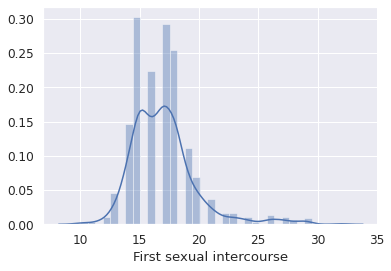

In [0]:
sns.distplot(df['First sexual intercourse'])

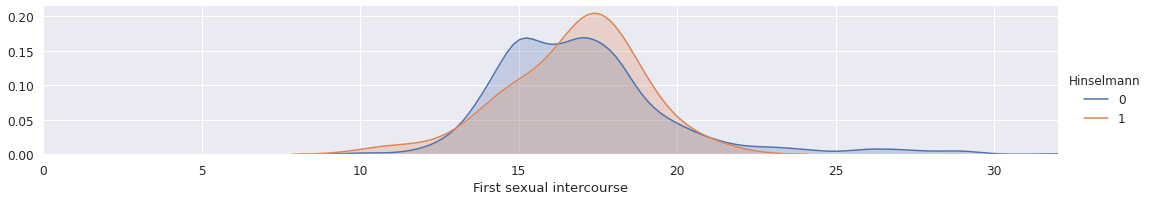

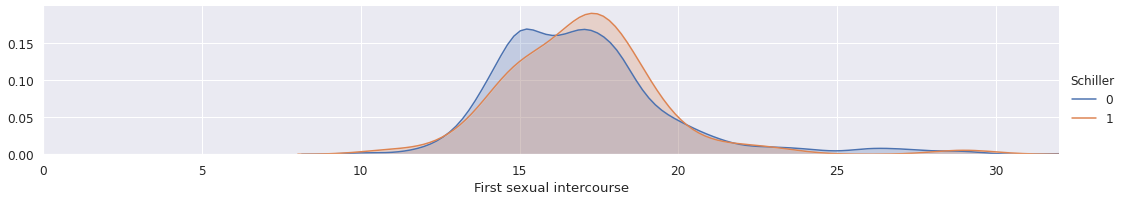

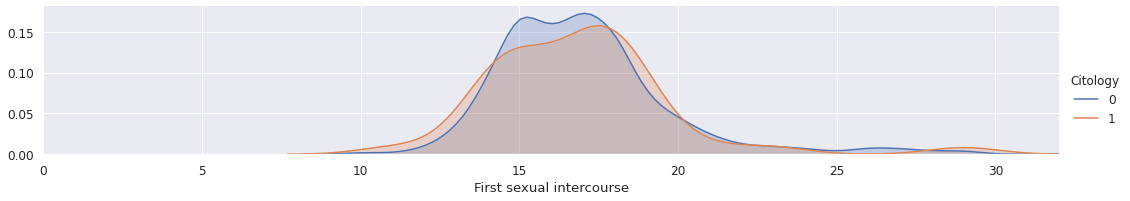

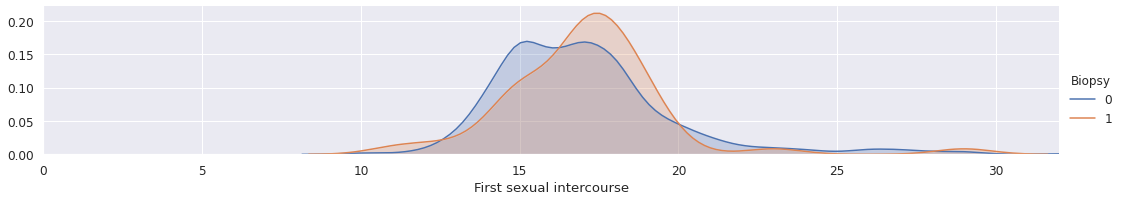

In [0]:
for feature in category_df:
  as_fig = sns.FacetGrid(df,hue=feature,aspect=5)
  as_fig.map(sns.kdeplot,'First sexual intercourse',shade=True)
  oldest = df['First sexual intercourse'].max()
  as_fig.set(xlim=(0,oldest))
  as_fig.add_legend()

Como mostrado nos gráficos de densidade acima, mulheres que começaram a ter relações sexuais entre 15-20 anos, foram as que tiveram maior chance de risco do câncer cervical.

In [0]:
pregancies_df = pd.crosstab(index=df["Hinselmann"], columns=[df["Num of pregnancies"],df['Number of sexual partners']])

pregancies_df

Num of pregnancies        0.0              1.0   ... 7.0  8.0      10.0 11.0
Number of sexual partners  1.0 2.0 3.0 4.0  1.0  ...  5.0  3.0 4.0  1.0  3.0
Hinselmann                                       ...                        
0                            5   5   5   1   81  ...    1    1   1    1    1
1                            0   0   0   0    4  ...    0    0   0    0    0

[2 rows x 69 columns]

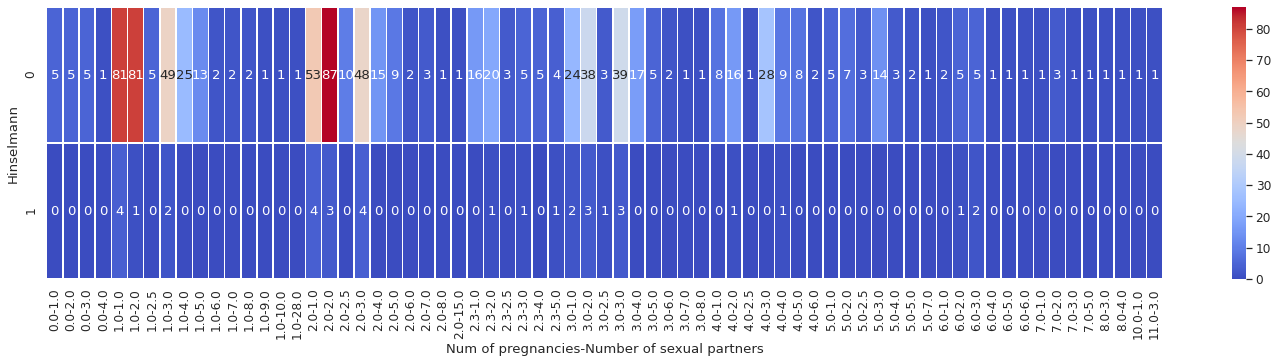

In [0]:
fig, ax = plt.subplots(figsize=(25,5))  
sns.heatmap(pregancies_df,annot=True, fmt="d", cmap="coolwarm", linewidths=0.5,ax=ax)

Acima é visto que 4% das mulheres com mais do que 3 gestações e mais do que 2 parceiros enfrentam o risco de câncer.
E a correlação entre número de gestações e de parceiros é uma correlação positiva fraca (valor próximo de zero):

In [0]:
df['Number of sexual partners'].corr(df['Num of pregnancies'])

0.07650561013366139

**Análise de fumantes:**

In [0]:
df['Smokes (packs/year)'] = pd.to_numeric(df['Smokes (packs/year)'])
print(f'Correlação entre Fumantes e tempo que fumam: {df["Smokes"].corr(df["Smokes (years)"])}')
print(f'Correlação entre Fumantes e quantidade de maços que fumam: {df["Smokes"].corr(df["Smokes (packs/year)"])}')

Correlação entre Fumantes e tempo que fumam: 0.6927983105817408
Correlação entre Fumantes e quantidade de maços que fumam: 0.4735240622738942


Pode-se remover a coluna 'Smokes' já que é mais relevante saber por quanto tempo a pessoa fuma ou fumou, dado pela 'Smokes (years)' do que se já fumou ou não. 

In [0]:
df.drop('Smokes',axis=1,inplace=True)

In [0]:
smokes_df = pd.crosstab(index=df["Schiller"], columns=[df["Smokes (years)"]])
smokes_df

Smokes (years),0.000000,0.160000,0.500000,1.000000,1.200000,1.266973,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,18.000000,19.000000,20.000000,21.000000,22.000000,24.000000,28.000000,32.000000,34.000000,37.000000
Schiller,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,665,1,3,8,11,14,6,7,5,7,4,4,6,8,4,5,2,2,3,3,6,1,3,1,1,1,0,1,1,0,1
1,57,0,0,0,2,1,1,0,0,2,0,2,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,0,0,1,0


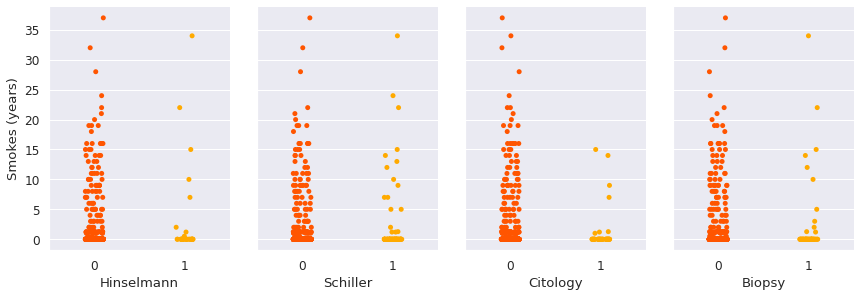

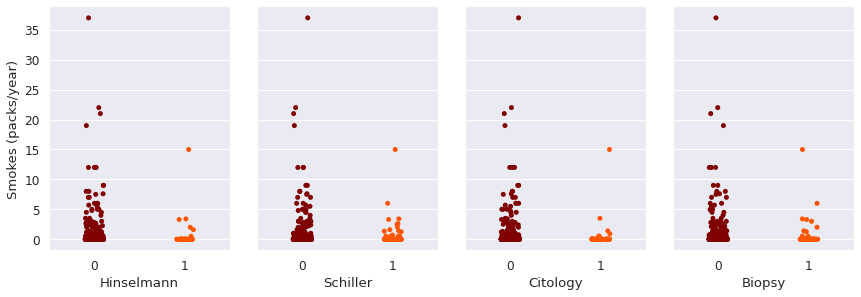

In [0]:
g = sns.PairGrid(df, y_vars=['Smokes (years)'], x_vars= category_df, aspect=.75, height=4)
g.map(sns.stripplot, palette="autumn");

g = sns.PairGrid(df, y_vars=['Smokes (packs/year)'], x_vars= category_df, aspect=.75, height=4)
g.map(sns.stripplot, palette="gist_heat");

Com base nos gráficos dos testes de Schiller e Biópsia, as mulheres que tem fumado por 5 anos ou mais, são as que correm maior risco de desenvolver o câncer.

**Análise do uso de contraceptivos hormonais:**

In [0]:
# Mesma lógica utilizada com fumantes, utilizando a quantidade de anos invés da booleana
df.drop('Hormonal Contraceptives',axis=1,inplace=True)

In [0]:
hormone_df = pd.crosstab(index=df["Schiller"], columns=[df["Hormonal Contraceptives (years)"]])
hormone_df

Hormonal Contraceptives (years),0.000000,0.080000,0.160000,0.170000,0.250000,0.330000,0.410000,0.420000,0.500000,0.580000,0.660000,0.670000,0.750000,1.000000,1.500000,2.000000,2.282201,2.300000,2.500000,3.000000,3.500000,4.000000,4.500000,5.000000,6.000000,6.500000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000,17.000000,19.000000,20.000000,22.000000,30.000000
Schiller,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,242,23,15,1,38,8,1,7,20,5,6,2,6,69,3,38,2,108,1,36,1,21,1,33,21,1,20,17,10,9,2,4,1,0,5,0,1,1,3,1,1
1,27,2,1,0,3,1,0,1,5,1,0,0,1,8,0,2,0,0,0,3,0,1,0,1,3,0,1,1,2,2,0,0,1,2,1,2,0,1,1,0,0


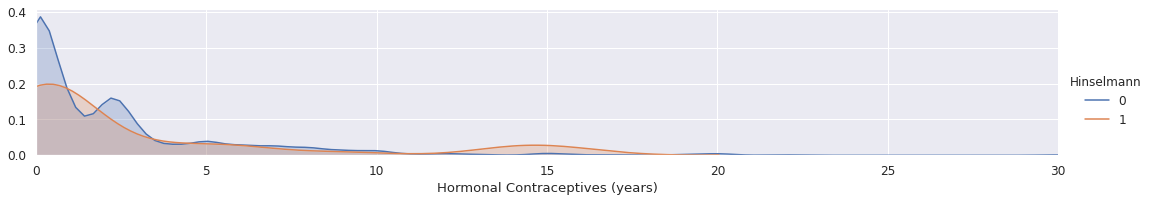

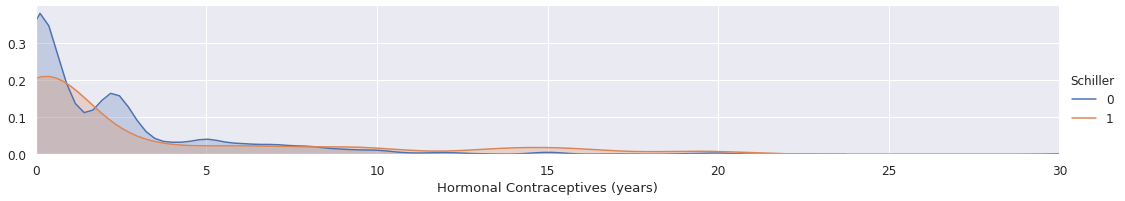

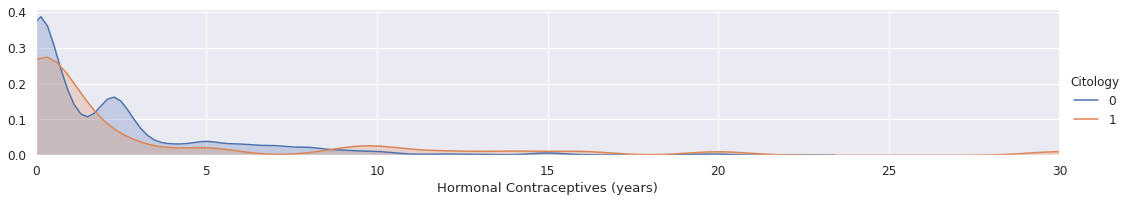

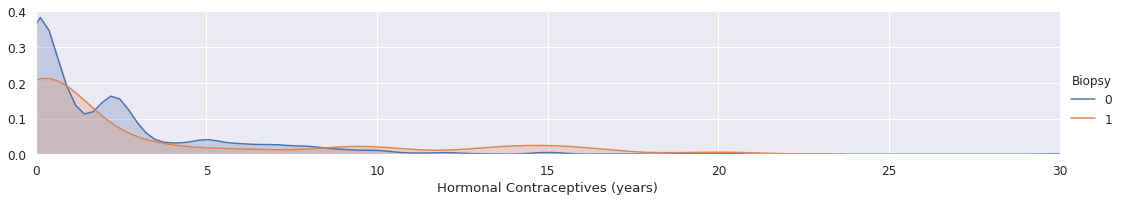

In [0]:
for feature in category_df:
  as_fig = sns.FacetGrid(df,hue=feature,aspect=5)
  as_fig.map(sns.kdeplot,'Hormonal Contraceptives (years)',shade=True)
  oldest = df['Hormonal Contraceptives (years)'].max()
  as_fig.set(xlim=(0,oldest))
  as_fig.add_legend()

Acima é possivel notar que o uso de contraceptivos hormonais por mais de 5 anos causam maior risco de câncer cervical. E que os pequenos picos entre 10 e 15 anos de uso, evidenciam um risco bem maior em relação as mulheres que não fazem o uso.

**Análise do uso de DIU como método contraceptivo:**

In [0]:
# Retirando a coluna IUD já que IUD (years) quando maior que zero já significa o uso de IUD
df.drop('IUD',axis=1,inplace=True)

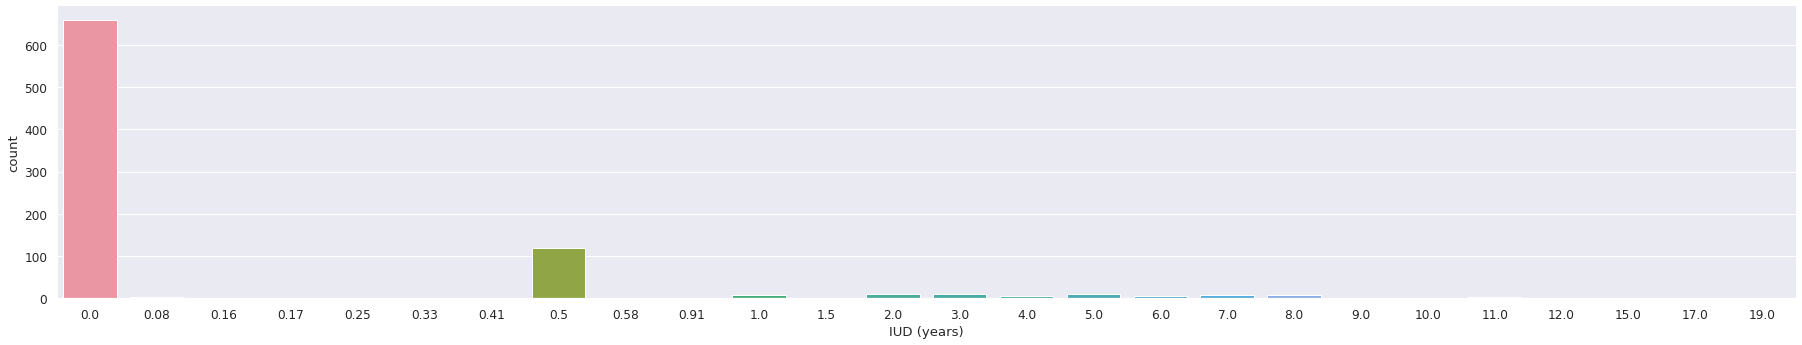

In [0]:
sns.catplot('IUD (years)',data=df,kind='count',aspect=5)

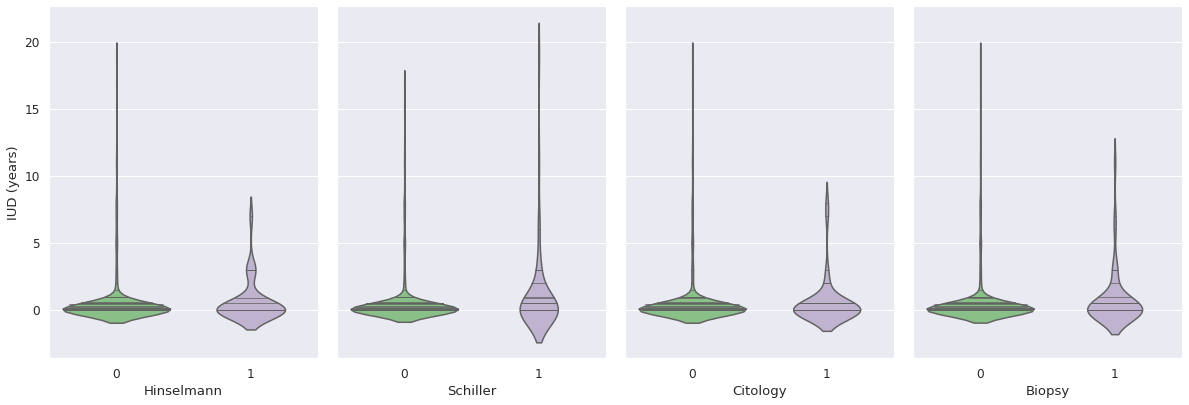

In [0]:
g = sns.PairGrid(df, y_vars=['IUD (years)'], x_vars= category_df, aspect=.75, height=5.5)
g.map(sns.violinplot, palette="Accent",inner='stick');

A grande distribuição de resultados negativos nos testes, mostra que o uso do DIU pode tornar menor o risco de câncer de colo de útero.

**Análise de Doenças Sexualmente Transmissíveis:**

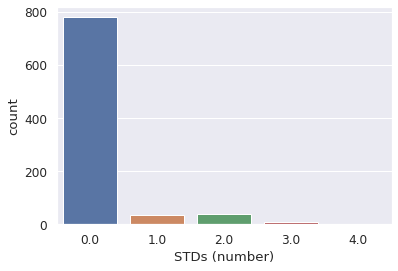

In [0]:
df['STDs (number)'] = round(pd.to_numeric(df['STDs (number)']))
sns.countplot('STDs (number)',data=df)

In [0]:
std_hil = pd.crosstab(index=df["Hinselmann"], columns=df["STDs (number)"])
std_cit = pd.crosstab(index=df["Citology"], columns=df["STDs (number)"])
std_sch = pd.crosstab(index=df["Schiller"], columns=df["STDs (number)"])
std_bio = pd.crosstab(index=df["Biopsy"], columns=df["STDs (number)"])

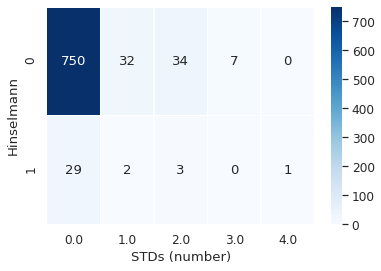

In [0]:
sns.heatmap(std_hil,annot=True, fmt="d",cmap="Blues",linewidths=0.5)

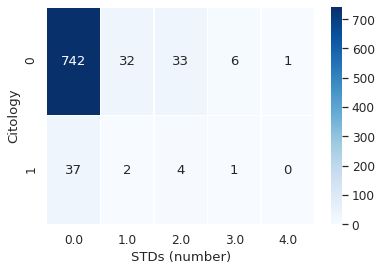

In [0]:
sns.heatmap(std_cit,annot=True, fmt="d",cmap="Blues",linewidths=0.5)

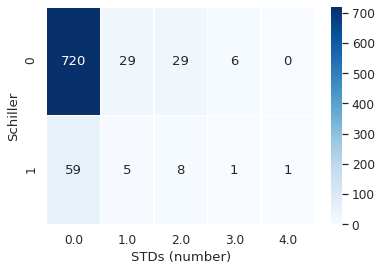

In [0]:
sns.heatmap(std_sch,annot=True, fmt="d",cmap="Blues",linewidths=0.5)

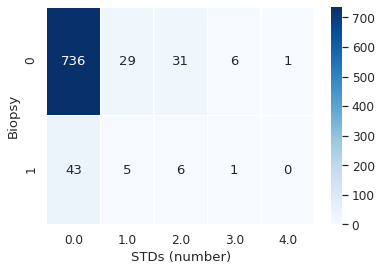

In [0]:
sns.heatmap(std_bio,annot=True, fmt="d",cmap="Blues",linewidths=0.5)

In [0]:
df.drop('Dx',axis=1,inplace=True)

**Construção do modelo de Machine Learning**

Estas são as 4 variáveis alvo do dataset:

In [0]:
df_features = df.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1)
df_label = pd.DataFrame(data=df['Hinselmann'])
df_label['Schiller'] = df['Schiller']
df_label['Citology'] = df['Citology']
df_label['Biopsy'] = df['Biopsy']

Para a construção do modelo, será criada uma função 'cancer_risk', que retorna a soma das variáveis alvo, podendo chegar em valores entre 0 e 4.
Estes valores representarão o nível de risco; quando 0 não há risco, quando 4 há um alto risco de câncer de colo de útero.

In [0]:
def cancer_risk(c_label):
  hil, sch, cit, bio = c_label
  return hil + sch + cit + bio

In [0]:
df_label['cancer_risk'] = df_label[['Hinselmann', 'Schiller', 'Citology','Biopsy']].apply(cancer_risk,axis=1)
df_label.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1,inplace=True)

print(f'Contador em cada variável alvo: {df_label["cancer_risk"].value_counts()}')
df_label = df_label.astype(int)
df_label = df_label.values.ravel()

Contador em cada variável alvo: 0    756
1     41
3     33
2     22
4      6
Name: cancer_risk, dtype: int64


Como o risco mais alto (4) possui apenas 6 pontos fica mais difícil treinar o modelo, mas a técnica de "Synthetic Minority Oversampling Technique" ou "SMOTE", ajuda a superar este desbalanceamento.
O SMOTE funciona selecionando exemplos que estão próximos no espaço de recurso, desenhando uma linha entre os exemplos no espaço de recurso e desenhando uma nova amostra em um ponto ao longo dessa linha.

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [0]:
# criando modelos
models = []
models.append(('LogisticRegMulti', LogisticRegressionCV(class_weight=None, multi_class='multinomial', solver='newton-cg', max_iter=1000,penalty='l2')))
models.append(('LogisticRegOVR', LogisticRegressionCV(class_weight=None, multi_class='ovr', solver='newton-cg', max_iter=1000,penalty='l2')))
models.append(('svm_linear', svm.LinearSVC(C=1.0,class_weight=None,multi_class='ovr',penalty='l2',max_iter=1000)))
models.append(('svm_rbf', svm.SVC(gamma='auto', C=1.2,degree=4, probability=True,kernel='rbf',decision_function_shape='ovr')))
models.append(('RandomForest',RandomForestClassifier(n_jobs=4, bootstrap=True, class_weight=None, criterion='gini',
                                                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                                                     min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10,
                                                     oob_score=False, random_state=None, verbose=0,warm_start=False)
))

Validando cada um dos modelos e aplicando o SMOTE

In [0]:
results_all = []
names = []
dict_method_score = {}
scoring = 'recall_weighted'

In [0]:
from imblearn.over_sampling import SMOTE, ADASYN
df_features_ovr, df_label_ovr = SMOTE().fit_sample(df_features, df_label)

In [0]:
print('Resultados da validação cruzada no conjunto de dados:\n')
for name, model in models:
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)
    cv_results = model_selection.cross_val_score(model, df_features_ovr, df_label_ovr, cv=skfold, scoring=scoring)    
    results_all.append(cv_results)
    names.append(name)
    dict_method_score[name] = (cv_results.mean(), cv_results.std())
    print("{:s}: {:.3f} ({:.3f})".format(name, cv_results.mean(), cv_results.std()))

Resultados da validação cruzada no conjunto de dados:

LogisticRegMulti: 0.546 (0.028)
LogisticRegOVR: 0.526 (0.035)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

svm_linear: 0.393 (0.088)
svm_rbf: 0.856 (0.008)
RandomForest: 0.947 (0.004)


Criando um modelo para fazer as predições:

In [0]:
random_forest_model = RandomForestClassifier(n_jobs=4, bootstrap=True, class_weight=None, criterion='gini',
                                             max_depth=None, max_features='auto', max_leaf_nodes=None,
                                             min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10,
                                             oob_score=False, random_state=None, verbose=0,warm_start=False)

random_forest_model.fit(df_features,df_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Testando a predição de risco:

In [0]:
def risk_classification(patient_info):
  risk = random_forest_model.predict(patient_info)
  classifications = {0:'Muito baixo', 1:'Baixo',2:'Médio', 3:'Alto', 4:'Muito alto'}
  return classifications.get(risk[0],"Não foi possível classificar")

**Paciente 1:** Mulher de 18 anos, 1 parceiro sexual, primeira relação aos 16 anos, nenhuma gestação, fuma há 1 ano, 4 pacotes por ano, não usa contraceptivos hormonais, sem DSTs.

In [0]:
print('Paciente 1:',risk_classification(np.array([[18,1,16,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))

Paciente 1: Muito baixo


**Paciente 2:** Mulher de 40 anos, 6 parceiros sexuais, primeira relação aos 13 anos, 2 gestações, fumante por 17 anos, 20 pacotes por ano, usou contraceptivos hormonais por 15 anos.

In [0]:
print('Paciente 2:',risk_classification(np.array([[40,6,13,2,17,20,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))

Paciente 2: Muito alto
